## Imports

In [2]:
import pandas as pd
import numpy as np
from itertools import combinations
import seaborn as sn
import matplotlib.pyplot as plt

# Exploratory Data Analysis (EDA)

Before we perform any feature engineering and start training models, we need to explore properties of the data.

In [3]:
data_file = '../tdt05-2021-challenge-2/challenge2_train.csv'
df = pd.read_csv(data_file)
df

,id,target,f0,f1,f2,f3,f4,f5,f6,f7,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28
0,0,0,1.0,gL,e,3.0,A,NaN,0.0,6.0,...,0.5,0.0,3.0,R,328b0cf4e,0.834041,T,N,1.0,14.2364
1,1,0,0.0,Rj,c,1.0,A,7.0,1.0,4.0,...,0.4,0.0,1.0,NaN,328b0cf4e,0.686021,T,N,1.0,NaN
2,2,0,NaN,In,a,1.0,A,10.0,1.0,6.0,...,0.5,1.0,3.0,G,0c67fcbbd,1.141271,T,N,3.0,NaN
3,3,1,1.0,rA,c,3.0,A,7.0,1.0,1.0,...,0.6,1.0,1.0,G,fee4e3007,0.662382,T,N,3.0,NaN
4,4,0,1.0,pE,c,3.0,A,7.0,0.0,6.0,...,0.5,0.0,1.0,B,587e040bd,-1.000000,T,N,1.0,13.9537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,1,0.0,tT,d,3.0,NaN,11.0,0.0,1.0,...,0.6,1.0,1.0,R,72ccba7a4,0.890576,T,N,3.0,14.0466
49996,49996,0,1.0,pB,b,2.0,A,7.0,0.0,6.0,...,0.1,0.0,7.0,R,250eea49d,NaN,T,N,1.0,14.0157
49997,49997,0,0.0,TL,e,1.0,A,11.0,0.0,6.0,...,NaN,0.0,7.0,G,110d4786e,1.327592,T,N,1.0,13.9255
49998,49998,0,0.0,Bx,a,1.0,A,7.0,1.0,4.0,...,0.4,0.0,3.0,R,0dcf409af,0.842615,T,S,1.0,14.3062


We see that the training set has 50000 rows, each with an ID, a target value (the class label to be predicted later), and 29 features. Let's explore some properties of each feature. First, we create a dataframe with only features (without ID and target):

In [4]:
# We first remove ID from the original data frame, and create a new one without target
df = df.drop(labels=['id'], axis=1)
df_feat = df.drop(labels=['target'], axis=1)

## Individual features

### Missing values
We first calculate how large percentages there are of missing values for each column, and plot it in a bar plot.

In [6]:
def plot_missing(df):
    percent_missing = [df[col].isnull().sum()/len(df) for col in df.columns]
    missing_values = pd.DataFrame({'Proportion_of_total_rows': percent_missing}, index=df.columns)
    missing_values.plot.barh()

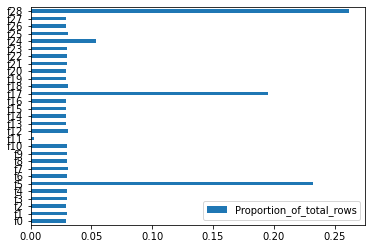

In [7]:
plot_missing(df_feat)

We see that f5, f17 and f28 all have a relatively large percent (17-25%) of missing values. These columns therefore need to have their missing values properly imputed, or the features might have to be removed alltogether.

In [8]:
df_feat_2 = df_feat.drop(labels=['f5','f17','f28'], axis=1)

We also check the test set for missing values:

In [9]:
data_file = '../tdt05-2021-challenge-2/challenge2_test.csv'
test_set = pd.read_csv(data_file)

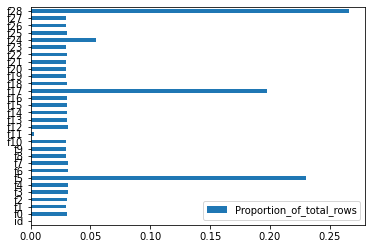

In [10]:
plot_missing(test_set)

The test set has the same proportions of missing values for each feature, so no more features need to be imputed or removed.

### Feature statistics
Below are some important statistical numbers of each numerical feature, such as mean, standard deviation and percentiles:

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f3'}>],
       [<AxesSubplot:title={'center':'f5'}>,
        <AxesSubplot:title={'center':'f6'}>],
       [<AxesSubplot:title={'center':'f7'}>, <AxesSubplot:>]],
      dtype=object)

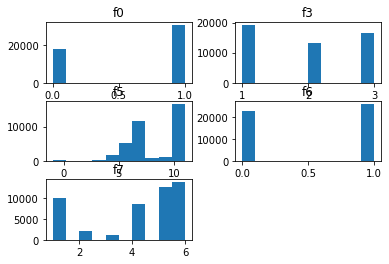

In [47]:
df_feat[df_feat.columns[0:10]].hist(grid=False, legend=False)

In [44]:
df_feat[df_feat.columns[0:10]].describe()

,f0,f3,f5,f6,f7
count,48541.000000,48512.000000,38383.000000,48510.000000,48475.000000
mean,0.629138,1.943643,8.293932,0.535993,4.102960
std,0.483040,0.852986,2.500502,0.498708,1.854649
min,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,0.000000,1.000000,7.000000,0.000000,3.000000
50%,1.000000,2.000000,7.000000,1.000000,5.000000
75%,1.000000,3.000000,11.000000,1.000000,6.000000
max,1.000000,3.000000,11.000000,1.000000,6.000000


For each of the numerical features above, the values are somewhat evenly distributed, except for for f5 and f7. Both these features have relatively uneven distribution of values, with some values almost completely lacking instances.

array([[<AxesSubplot:title={'center':'f11'}>,
        <AxesSubplot:title={'center':'f16'}>],
       [<AxesSubplot:title={'center':'f17'}>,
        <AxesSubplot:title={'center':'f19'}>],
       [<AxesSubplot:title={'center':'f20'}>, <AxesSubplot:>]],
      dtype=object)

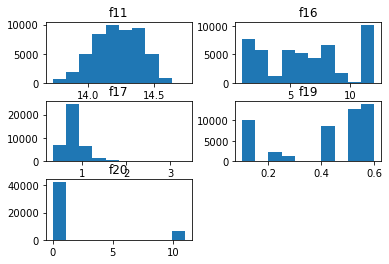

In [59]:
df_feat[df_feat.columns[10:21]].hist(grid=False, legend=False)

In [61]:
df_feat[df_feat.columns[10:21]].describe()

,f11,f16,f17,f19,f20
count,49855.000000,48540.000000,40238.000000,48563.000000,48536.000000
mean,14.223701,6.402328,0.810849,0.410788,1.688293
std,0.170868,3.465100,0.222827,0.185523,3.387964
min,13.733200,1.000000,0.331538,0.100000,0.000000
25%,14.098300,3.000000,0.669387,0.300000,0.000000
50%,14.225500,6.000000,0.764858,0.500000,0.000000
75%,14.361100,8.000000,0.905196,0.600000,1.000000
max,14.733000,12.000000,3.336373,0.600000,11.000000


Here, f11 seems to have a bell curve (normal distribution), while f17 has a long tail one. Otherwise, f16, f19 and f20 all have rather uneven distributions.

array([[<AxesSubplot:title={'center':'f21'}>,
        <AxesSubplot:title={'center':'f24'}>],
       [<AxesSubplot:title={'center':'f27'}>,
        <AxesSubplot:title={'center':'f28'}>]], dtype=object)

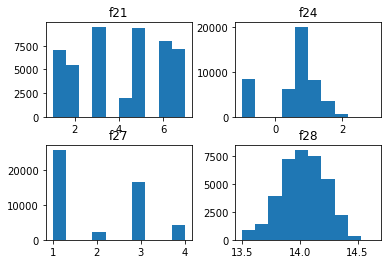

In [62]:
df_feat[df_feat.columns[21:29]].hist(grid=False, legend=False)

In [63]:
df_feat[df_feat.columns[21:29]].describe()

,f21,f24,f27,f28
count,48490.000000,47304.000000,48536.000000,36888.000000
mean,4.106806,0.552094,1.978943,14.024757
std,2.030272,0.792686,1.099767,0.190223
min,1.000000,-1.000000,1.000000,13.495200
25%,2.000000,0.526783,1.000000,13.894575
50%,5.000000,0.722842,1.000000,14.026400
75%,6.000000,0.998749,3.000000,14.165000
max,7.000000,2.947457,4.000000,14.645600


Feature f28 has a close to normal distribution, and f24 a skewed one if '-1' is considered a missing value encoding. Meanwhile, f21 and f27 are quite unevenly distributed.

## Target distribution

Now we check the distribution of rows to each target class:

<AxesSubplot:ylabel='Frequency'>

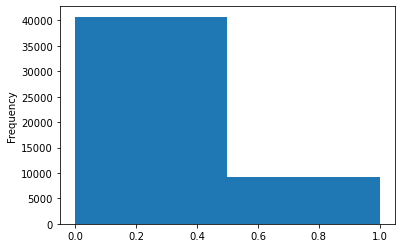

In [11]:
df['target'].plot.hist(bins=2)

In [12]:
df[['target']].value_counts()

target
0         40744
1          9256
dtype: int64

With almost 41K rows labeled '0' and a little over 9K rows labeled '1', the dataset is quite imbalanced (around a 4:1 ratio of rows between the classes). This means that the dataset must either be resampled, or we must account for the imbalance in model selection and training.

## Feature relations

We now plot a heat map, that is a matrix of correlation values for each combination of scalar features: 

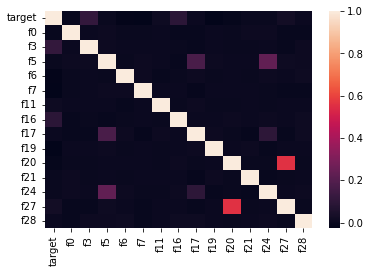

In [13]:
corr = df.corr()
sn.heatmap(corr)
plt.show()

We see that most features are hardly correlating at a all with other features, except for some combinations. There is also some slight correlation between the target and the features f3 and f5, which might indicate a useful pattern for prediction. Therefore, the feature pairs f5-f17, f5-f24, f17-f24 and f20-f27, and the target-feature pairs target-f3 and target-f5, will be further examined:

<AxesSubplot:xlabel='f5', ylabel='f17'>

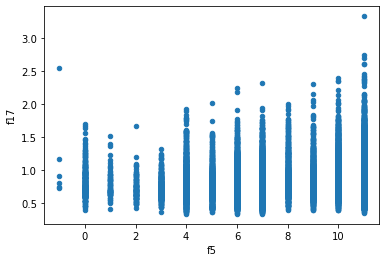

In [26]:
# We use a scatter plot since f17 has a continous interval (floating point) value range
df.plot.scatter('f5', 'f17')

<AxesSubplot:xlabel='f5', ylabel='f24'>

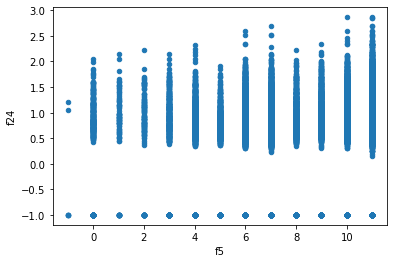

In [28]:
# We use a scatter plot since f24 has a continous interval (floating point) value range
df.plot.scatter('f5', 'f24')

<AxesSubplot:xlabel='f17', ylabel='f24'>

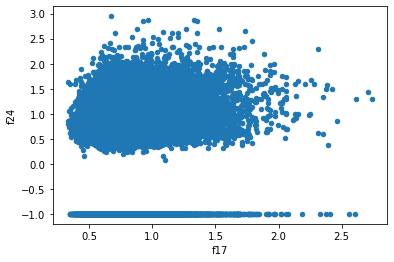

In [29]:
# We use a scatter plot since f17 and f24 both have continous interval (floating point) value ranges
df.plot.scatter('f17', 'f24')

In [32]:
# We use a correlation matrix since f20 and f27 both have ordinal/categorical (integer) value ranges
pd.crosstab(df['f20'], df['f27'], normalize="index", dropna=False)

f27,1.0,2.0,3.0,4.0
f20,,,,
0.0,1.0,0.0,0.0,0.0
1.0,0.0,0.0,1.0,0.0
10.0,0.0,0.0,0.0,1.0
11.0,0.0,1.0,0.0,0.0


In [34]:
# We use a correlation matrix since both f3 and the target have ordinal/categorical (integer) value ranges
pd.crosstab(df['f3'], df['target'], normalize="index", dropna=False)

target,0,1
f3,,
1.0,0.861460,0.138540
2.0,0.813581,0.186419
3.0,0.761279,0.238721


In [38]:
# We use a correlation matrix since both f16 and the target have ordinal/categorical (integer) value ranges
pd.crosstab(df['f16'], df['target'], normalize="index", dropna=False)

target,0,1
f16,,
1.0,0.881785,0.118215
2.0,0.886866,0.113134
3.0,0.846301,0.153699
4.0,0.849917,0.150083
5.0,0.832337,0.167663
6.0,0.766330,0.233670
7.0,0.799547,0.200453
8.0,0.808697,0.191303
9.0,0.790487,0.209513


There is some slight correlation between the feature pairs of f5-f17, f5-f24, f17-f24, but this should not warrant any change in how these features are engineered. However, we see that the values of feature f20 maps exactly one-to-one to the values of f27, meaning that both features seem to encode exactly the same (or directly related) information. Since including both features will not add any useful information to the learner, one of them can be dropped.

When it comes to correlation between the features f3 and f16 and the target, we see that there certainly is some correlation between them. Both f3 and f16 has an increasing chance of belonging to class '1' with increasing values. This information might help us use these features better to predict the target.